## CAUSAL IMPACT ANALYSIS ON TESLA STOCK AFTER ELON MUSK'S AQUISITION OF TWITTER

In [78]:
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact

In [133]:
training_s = "2022-07-05"
training_e = " 2022-10-26"
treatment_s = "2022-10-27" # the day he bought twitter
treatment_e = "2023-3-1"
end = "2023-3-2"

In [144]:
stock = ["TSLA","BMW.DE","VOW3.DE","HYMTF","GM"]
df = yf.download(stock, start = training_s, end = end, interval = "1d")


[*********************100%***********************]  5 of 5 completed


In [135]:
# ONLY WANT ADJUSTED CLOSE
df = df.iloc[:,:5].dropna()
df.head()
df = df.droplevel(level = 0, axis = 1)
df

,BMW.DE,GM,HYMTF,TSLA,VOW3.DE
Date,,,,,
2022-07-05,71.500000,32.149696,33.840000,233.066666,103.937195
2022-07-06,71.370003,31.057184,33.150002,231.733337,103.799530
2022-07-07,74.779999,32.437725,33.950001,244.543335,109.237305
2022-07-08,76.040001,32.090107,34.250000,250.763336,115.690361
2022-07-11,73.790001,30.659906,30.100000,234.343338,112.093857
...,...,...,...,...,...
2023-02-23,99.650002,39.158768,35.209999,202.070007,131.899994
2023-02-24,97.190002,39.088932,34.959999,196.880005,127.800003
2023-02-27,98.160004,39.218628,34.750000,207.630005,129.339996


## CORRELATION MATRIX

- to decide which companies we keep in the control group

In [147]:
# Getting dataset only for the training period


In [137]:
df_corr = df.loc[df.index < training_e]
df_corr.head()

,BMW.DE,GM,HYMTF,TSLA,VOW3.DE
Date,,,,,
2022-07-05,71.500000,32.149696,33.840000,233.066666,103.937195
2022-07-06,71.370003,31.057184,33.150002,231.733337,103.799530
2022-07-07,74.779999,32.437725,33.950001,244.543335,109.237305
2022-07-08,76.040001,32.090107,34.250000,250.763336,115.690361
2022-07-11,73.790001,30.659906,30.100000,234.343338,112.093857


In [138]:
df_corr.corr()

,BMW.DE,GM,HYMTF,TSLA,VOW3.DE
BMW.DE,1.000000,0.221728,0.379895,0.208293,0.329377
GM,0.221728,1.000000,0.385210,0.781257,0.884515
HYMTF,0.379895,0.385210,1.000000,0.681771,0.565869
TSLA,0.208293,0.781257,0.681771,1.000000,0.849984
VOW3.DE,0.329377,0.884515,0.565869,0.849984,1.000000


In [139]:
# WE REMOVE BMW AS IT HAD THE LOWEST CORRELATION
end_stock = df[["TSLA","VOW3.DE","HYMTF","GM"]]

In [140]:
end_stock

,TSLA,VOW3.DE,HYMTF,GM
Date,,,,
2022-07-05,233.066666,103.937195,33.840000,32.149696
2022-07-06,231.733337,103.799530,33.150002,31.057184
2022-07-07,244.543335,109.237305,33.950001,32.437725
2022-07-08,250.763336,115.690361,34.250000,32.090107
2022-07-11,234.343338,112.093857,30.100000,30.659906
...,...,...,...,...
2023-02-23,202.070007,131.899994,35.209999,39.158768
2023-02-24,196.880005,127.800003,34.959999,39.088932
2023-02-27,207.630005,129.339996,34.750000,39.218628


In [141]:
## defining the pre and post period
pre_period = [training_s, training_e]
post_period = [treatment_s,treatment_e]

C:\Users\Josip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Josip\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
C:\Users\Josip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Josip\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

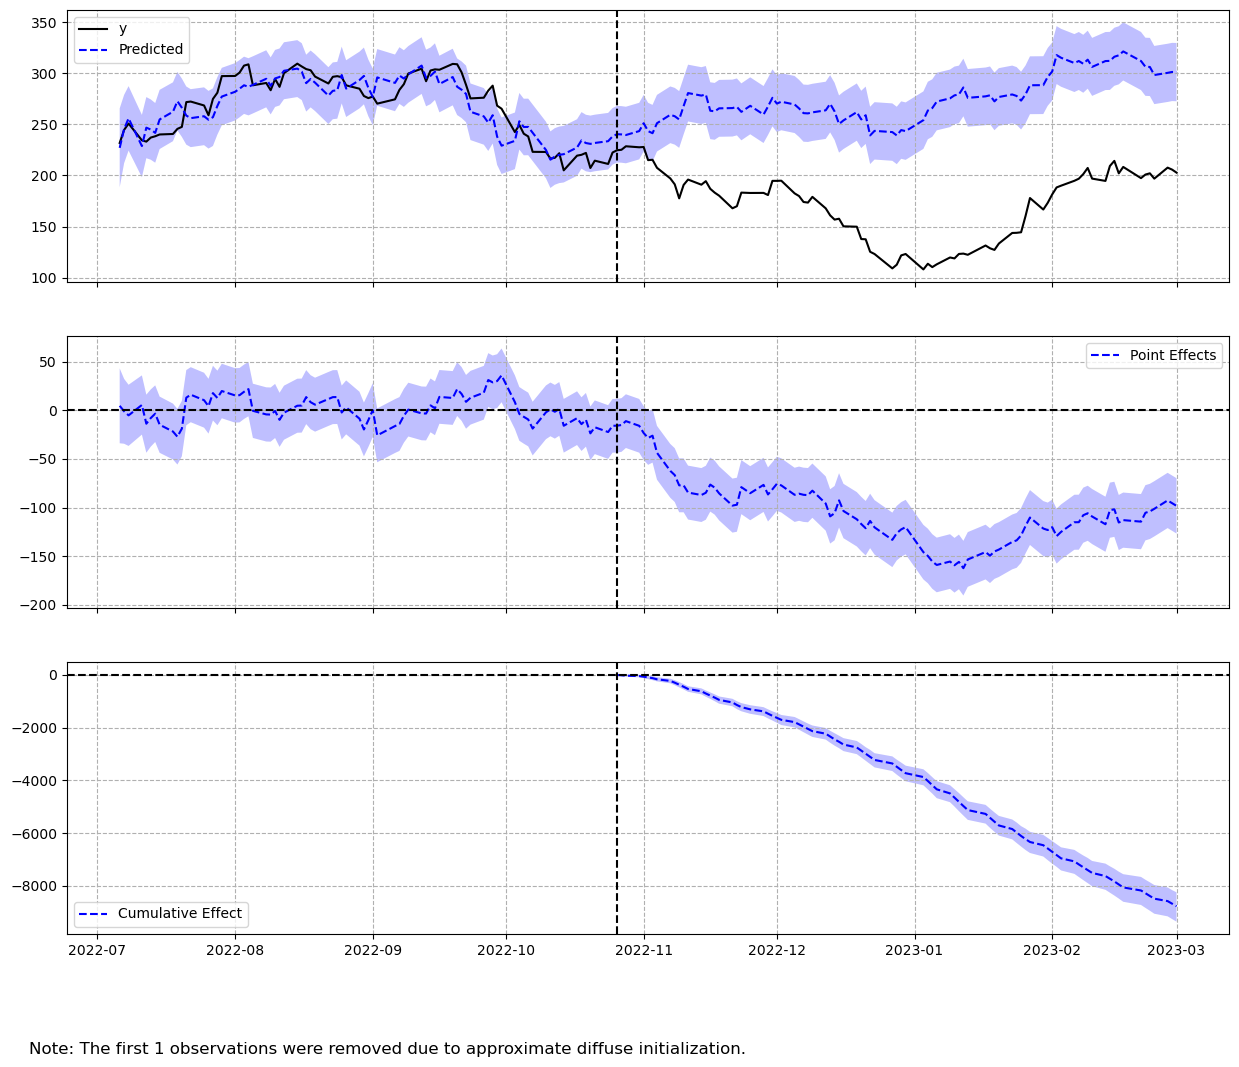

In [142]:
impact = CausalImpact(data=end_stock, pre_period=pre_period, post_period=post_period)
impact.plot()

In [151]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    171.67             14592.13
Prediction (s.d.)         274.82 (3.34)      23359.85 (283.99)
95% CI                    [268.61, 281.7]    [22831.43, 23944.66]

Absolute effect (s.d.)    -103.15 (3.34)     -8767.72 (283.99)
95% CI                    [-110.03, -96.93]  [-9352.53, -8239.3]

Relative effect (s.d.)    -37.53% (1.22%)    -37.53% (1.22%)
95% CI                    [-40.04%, -35.27%] [-40.04%, -35.27%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
